In [213]:
import math
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

In [96]:
def plot_it(signal, srate, time):

    n = len(time)
    hz = np.linspace(0, srate, n)
    
    # Compute amplitude spectrum
    ampl = 2 * np.abs(np.fft.fft(signal) / n)
    
    
    # Plot in time domain
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    plt.plot(time, signal, 'k', linewidth=2)
    plt.xlabel('Time (sec.)')
    plt.ylabel('Amplitude')
    plt.title('Time Domain')
    plt.xlim([time[0] + .05, time[-1] - .05])
    plt.ylim([min(signal) * 1.1, max(signal) * 1.1])
   
    # Plot in frequency domain
    plt.subplot(2, 1, 2)
    plt.stem(hz, ampl, 'k', basefmt=" ")
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.title('Frequency Domain')
    plt.xlim([0, 100])
    
    plt.tight_layout()
    plt.show()

In [97]:
# Sampling rate and time vector
srate = 16000
time = np.arange(0, 2, 1/srate)

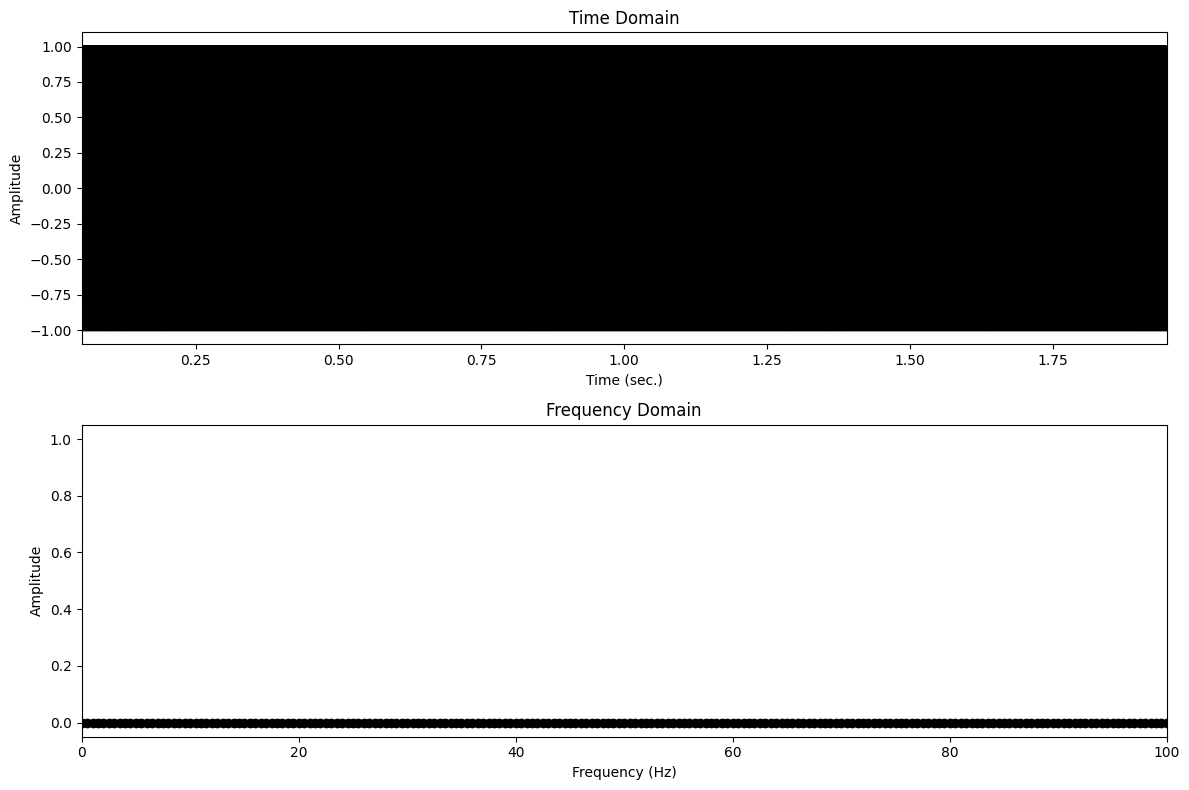

In [135]:
# Pure sine wave
signal = np.sin(1 * np.pi * 1000 * time)
plot_it(signal, srate, time)

In [136]:
Audio(signal, rate=srate)

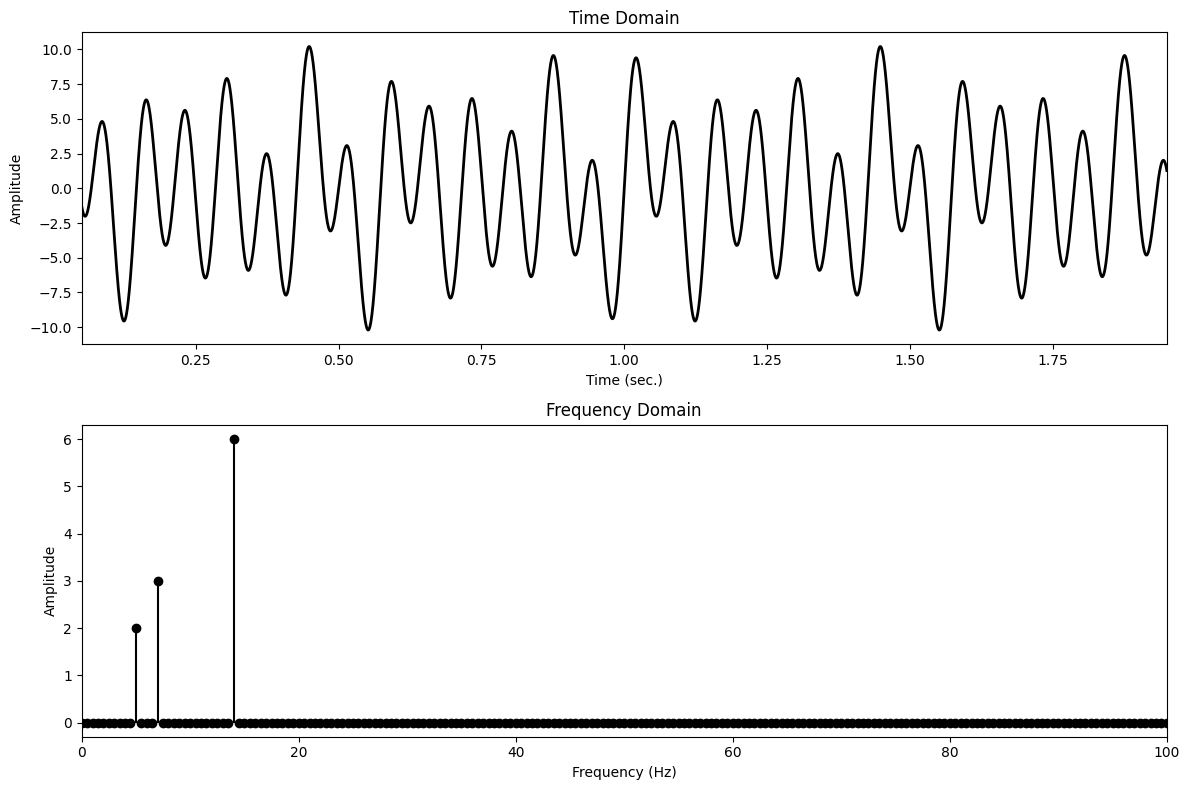

In [143]:
# Multispectral wave
signal = (
    2 * np.sin(2 * np.pi * 5 * time) +
    3 * np.sin(2 * np.pi * 7 * time) + 
    6 * np.sin(2 * np.pi * 14 * time)
)

plot_it(signal, srate, time)

In [144]:
Audio(signal, rate=srate)

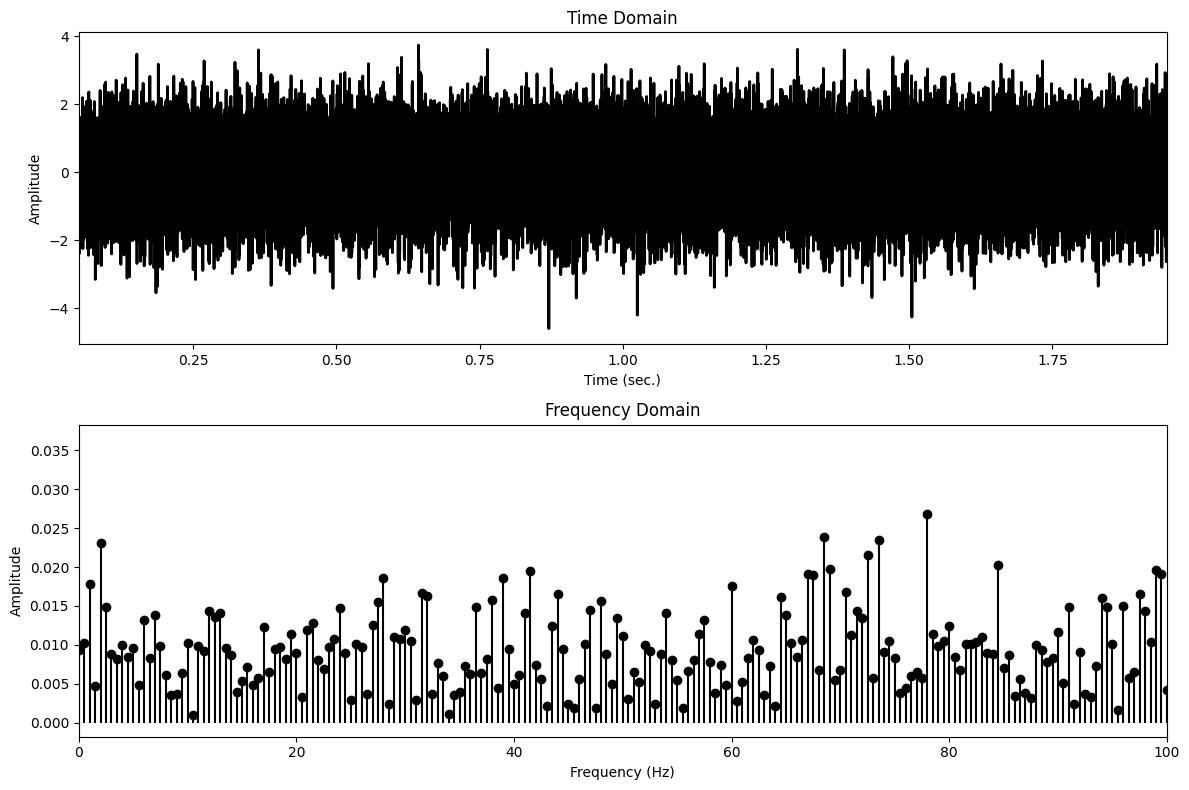

In [145]:
# White noise
signal = np.random.randn(len(time))
plot_it(signal, srate, time)

In [146]:
Audio(signal, rate=srate)

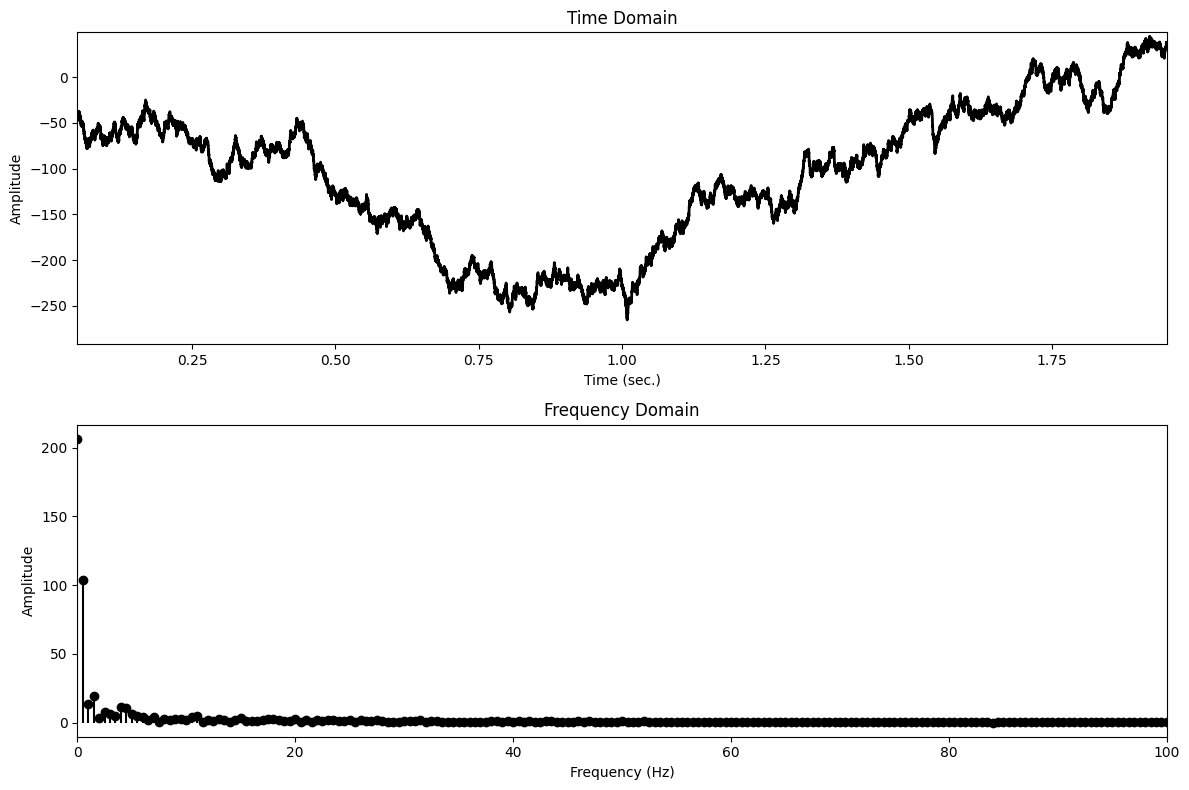

In [151]:
# Brownian noise (random walk)
signal = np.cumsum(np.random.randn(len(time)))
plot_it(signal, srate, time)

In [152]:
Audio(signal, rate=srate)

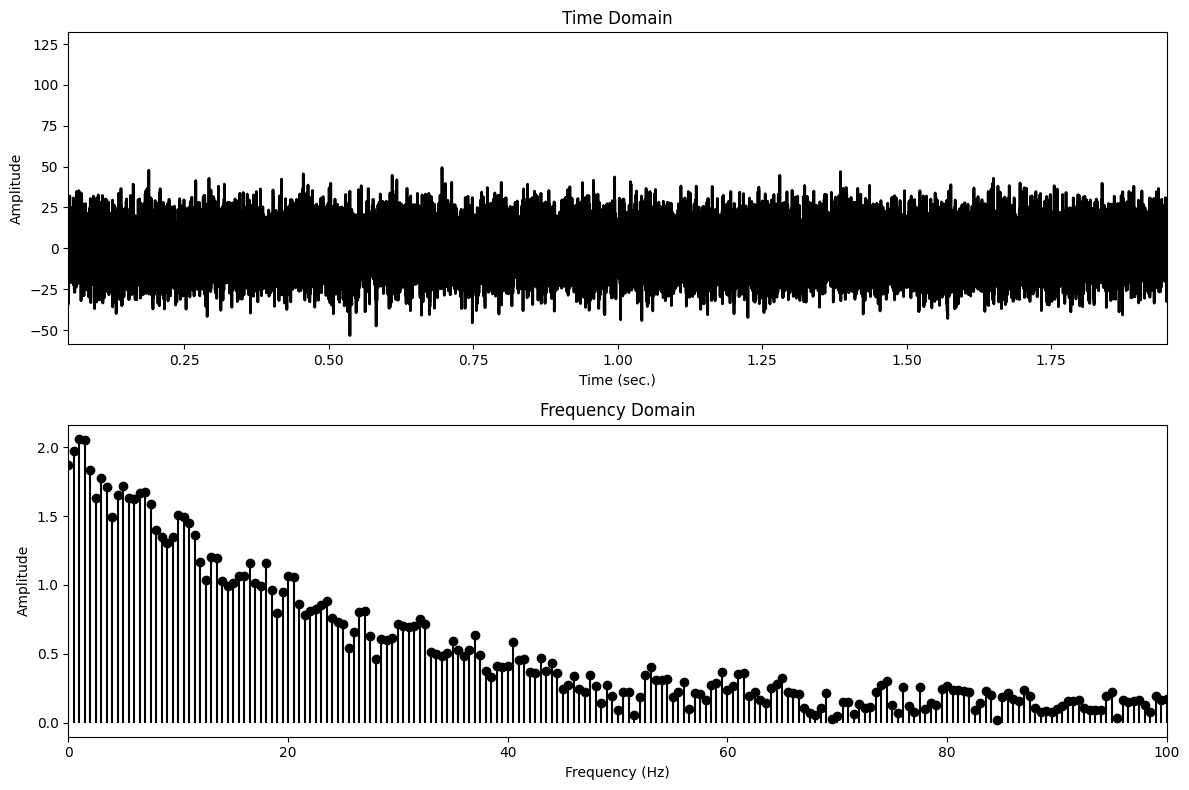

In [154]:
# 1/f noise
n = len(time)
ps = np.exp(1j * 2 * np.pi * np.random.rand(n//2)) * .1 + np.exp(-(np.arange(1, n//2+1))/50)
ps = np.concatenate((ps, ps[::-1]))
signal = np.real(np.fft.ifft(ps)) * n
plot_it(signal, srate, time)

In [155]:
Audio(signal, rate=srate)

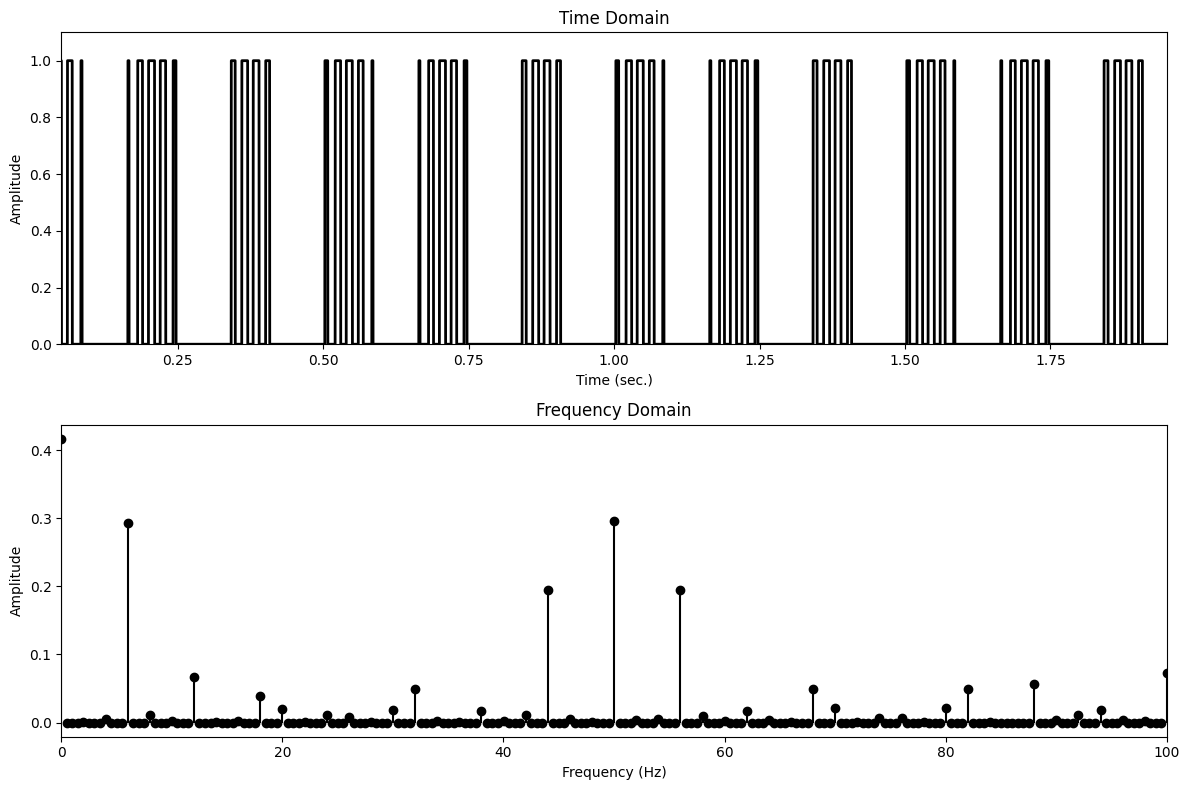

In [163]:
# Square wave
signal = np.zeros(len(time))
signal[(np.sin(2 * np.pi * 6 * time) + np.sin(2 * np.pi * 50 * time)) > .9] = 1 
plot_it(signal, srate, time)

In [164]:
Audio(signal, rate=srate)

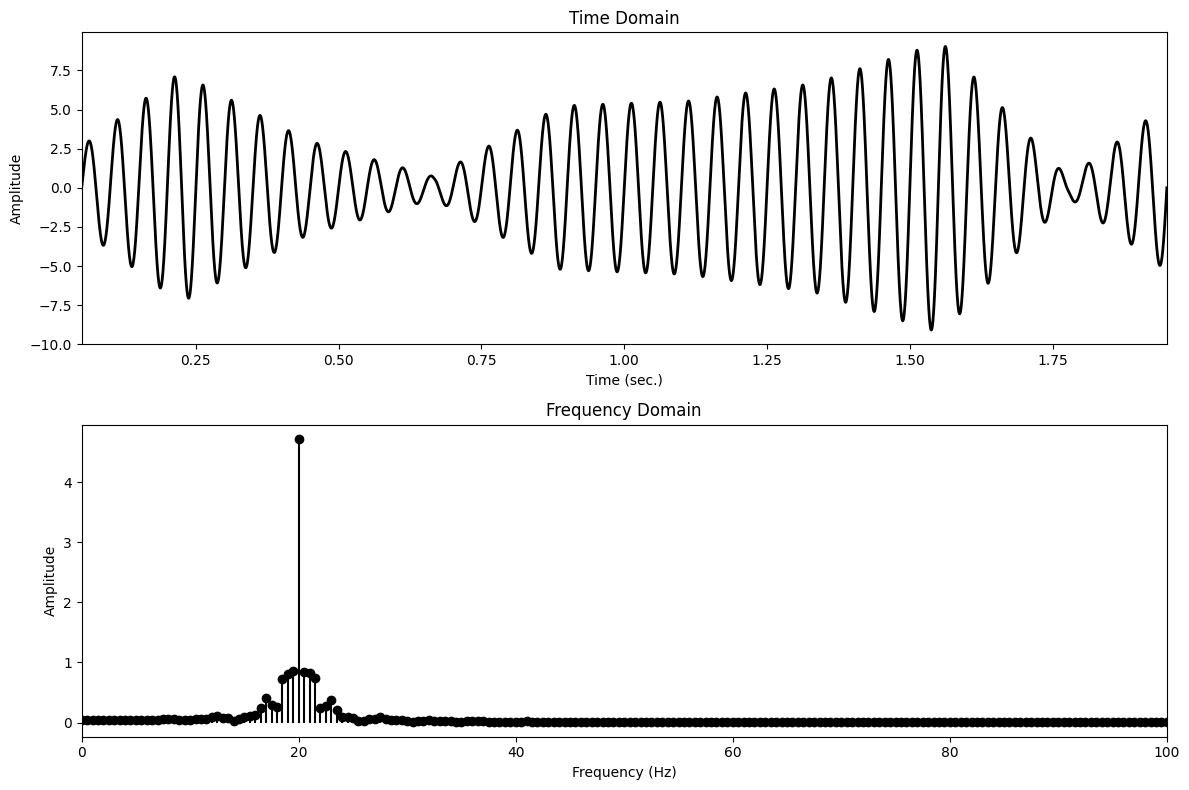

In [178]:
# Amplitude modulation
signal = 10 * np.interp(
    np.linspace(0, 9, len(time)), 
    np.arange(0, 10), 
    np.random.rand(10)
)* np.sin(2 * np.pi * 20 * time)
plot_it(signal, srate, time)

In [179]:
Audio(signal, rate=srate)

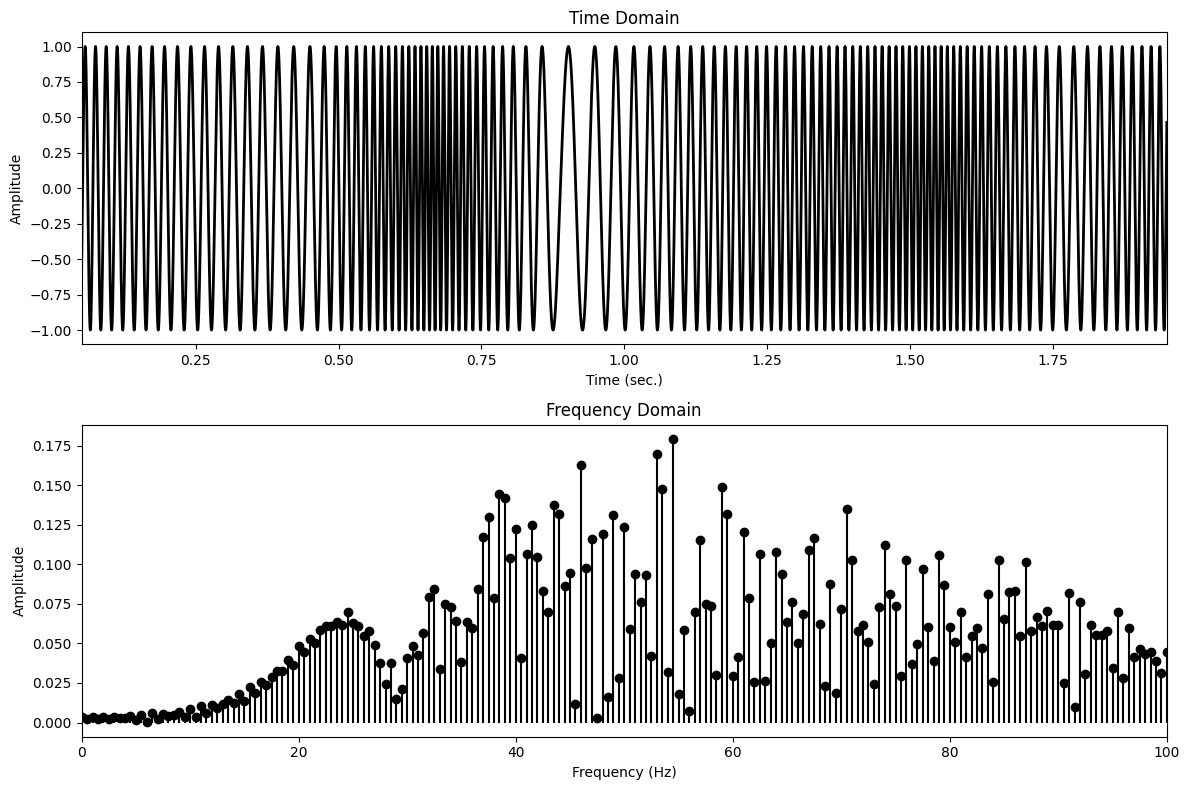

In [183]:
# Frequency modulation
freqmod = 100 * np.interp(np.linspace(0, 9, len(time)), np.arange(0, 10), np.random.rand(10))
signal = np.sin(2 * np.pi * (10 * time + np.cumsum(freqmod)/srate))
plot_it(signal, srate, time)

In [185]:
Audio(signal, rate=srate)

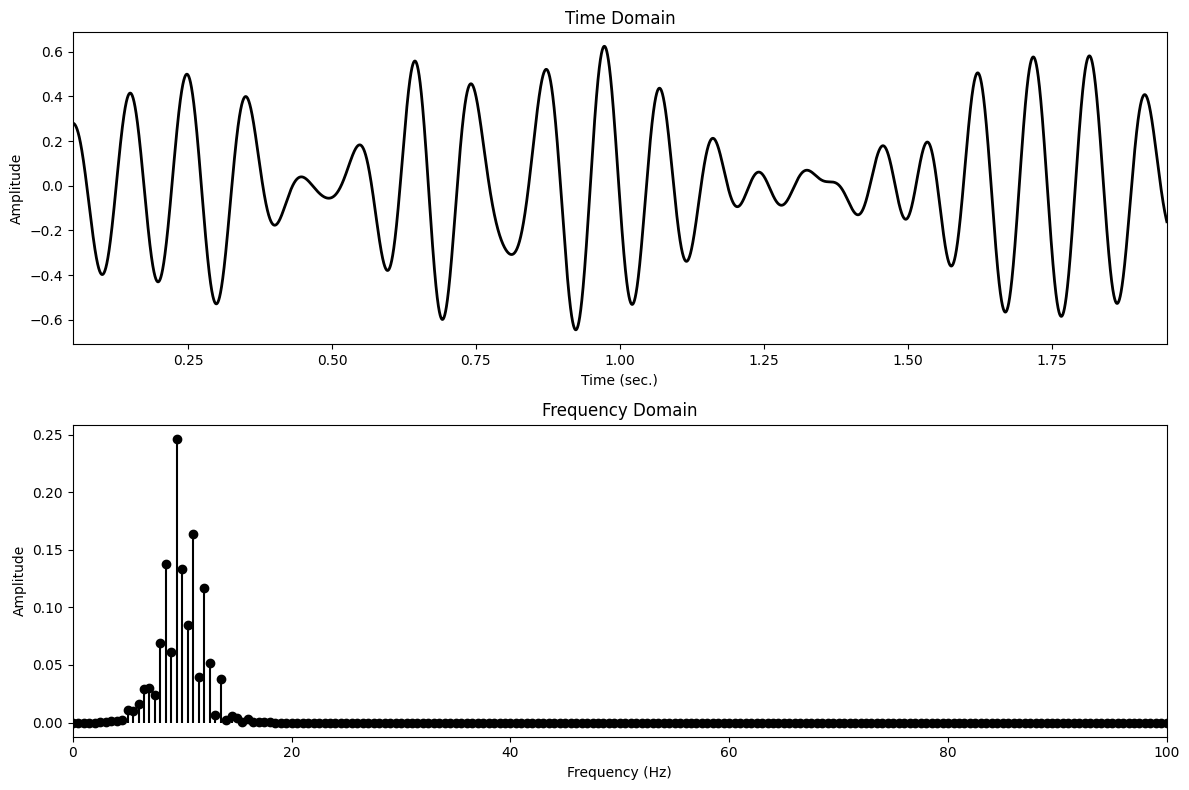

In [188]:
# Filtered noise
# Amplitude and frequency both change over time
n = len(time)
hz = np.linspace(0, srate, n)
signal = np.random.randn(len(time))
s = 5 * (2 * np.pi - 1) / (4 * np.pi)  # normalized width
fx = np.exp(-.5 * ((hz - 10) / s)**2)  # gaussian
fx = fx / max(fx)  # gain-normalize
signal = 20 * np.real(np.fft.ifft(np.fft.fft(signal) * fx))
plot_it(signal, srate, time)

In [189]:
Audio(signal, rate=srate)

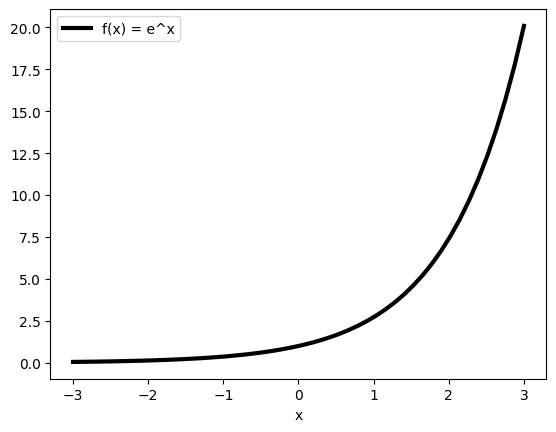

In [195]:
import matplotlib.pyplot as plt
import numpy as np

# Plot e^x
plt.figure(2)
plt.clf()
x = np.linspace(-3, 3, 50)
plt.plot(x, np.exp(x), 'k', linewidth=3)
# plt.axis('square')
plt.xlabel('x')
plt.legend(['f(x) = e^x'])
plt.grid(True, which='minor')
plt.show()

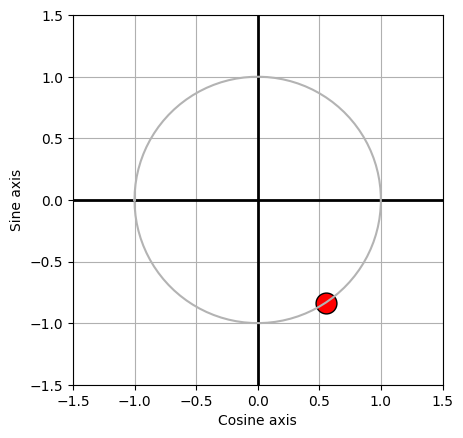

In [204]:
# [cos(k) sin(k)] are on the unit circle for any k
k = -654321657546546

plt.figure(3)
plt.clf()
h1 = plt.plot(np.cos(k), np.sin(k), 'ko', markerfacecolor='r', markersize=15)

plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(plt.gca().get_xlim(), [0, 0], 'k', linewidth=2)
plt.plot([0, 0], plt.gca().get_ylim(), 'k', linewidth=2)
plt.xlabel('Cosine axis')
plt.ylabel('Sine axis')

# Draw a unit circle
x = np.linspace(-np.pi, np.pi, 100)
h = plt.plot(np.cos(x), np.sin(x), color=[0.7, 0.7, 0.7]) # light gray

plt.show()

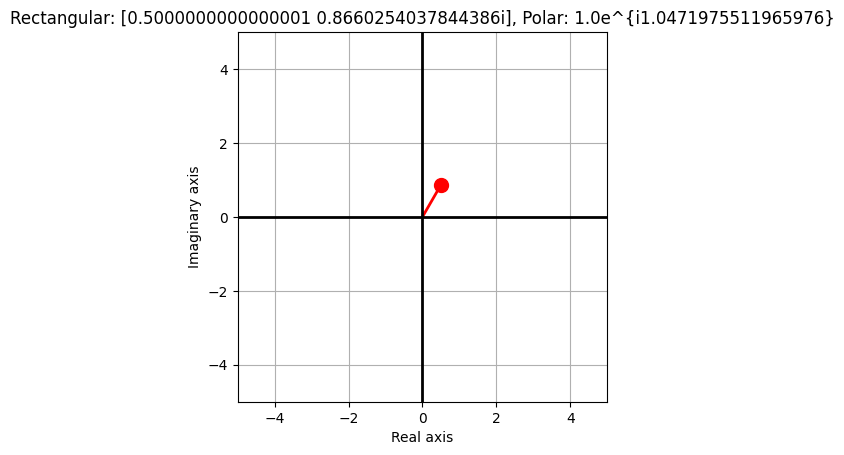

In [209]:
# Use Euler's formula to plot vectors
m = 1
k = np.pi / 3
compnum = m * np.exp(1j * k)

# Extract magnitude and angle
mag = np.abs(compnum)
phs = np.angle(compnum)

# Cartesian plot
plt.figure(4)
plt.clf()
plt.plot(np.real(compnum), np.imag(compnum), 'ro', linewidth=2, markersize=10, markerfacecolor='r')
plt.plot([0, np.real(compnum)], [0, np.imag(compnum)], 'r', linewidth=2)  # Line from origin to the point


# Make plot look nicer
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(plt.gca().get_xlim(), [0, 0], 'k', linewidth=2)
plt.plot([0, 0], plt.gca().get_ylim(), 'k', linewidth=2)
plt.xlabel('Real axis')
plt.ylabel('Imaginary axis')

# Title
plt.title(f'Rectangular: [{np.real(compnum)} {np.imag(compnum)}i], Polar: {mag}e^{{i{phs}}}')
plt.show()

In [218]:
## The DTFT in loop-form

# create the signal
srate  = 1000 # hz
time   = np.arange(0.,2.,1/srate) # time vector in seconds
pnts   = len(time) # number of time points
signal = (
    2.5 * np.sin( 2*np.pi*4*time ) + 
    1.5 * np.sin( 2*np.pi*6.5*time )
)


# prepare the Fourier transform
fourTime = np.array(range(pnts))/pnts
fCoefs   = np.zeros((len(signal)),dtype=complex)
fourTime

array([0.000e+00, 5.000e-04, 1.000e-03, ..., 9.985e-01, 9.990e-01,
       9.995e-01])

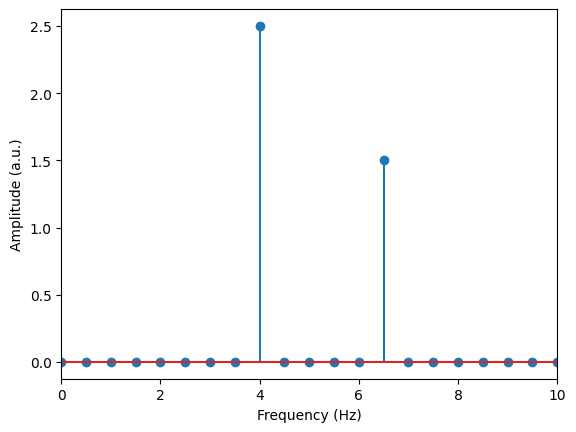

In [219]:

for fi in range(pnts):
    
    # create complex sine wave
    csw = np.exp( -1j*2*np.pi*fi*fourTime )
    
    # compute dot product between sine wave and signal
    # these are called the Fourier coefficients
    fCoefs[fi] = np.sum( np.multiply(signal,csw) ) / pnts


# extract amplitudes
ampls = 2*np.abs(fCoefs)

# compute frequencies vector
hz = np.linspace(0,srate/2,int(math.floor(pnts/2.)+1))

plt.stem(hz,ampls[range(len(hz))])
plt.xlabel('Frequency (Hz)'), plt.ylabel('Amplitude (a.u.)')
plt.xlim(0,10)
plt.show()

""""

In [223]:
import re
def extract_urls(text):
    # Regular expression to find all href="url" patterns
    url_pattern = re.compile(r'href="([^"]+)"')
    
    # Find all matches
    urls = url_pattern.findall(text)
    
    return urls

In [225]:
extracted_urls

['https://www.linkedin.com/company/1000/',
 'https://www.linkedin.com/company/1000/',
 '#add-small',
 'https://www.linkedin.com/company/1009/',
 'https://www.linkedin.com/company/1009/',
 '#check-small',
 'https://www.linkedin.com/company/1016/',
 'https://www.linkedin.com/company/1016/',
 '#add-small',
 'https://www.linkedin.com/company/1025/',
 'https://www.linkedin.com/company/1025/',
 '#add-small',
 'https://www.linkedin.com/company/1028/',
 'https://www.linkedin.com/company/1028/',
 '#check-small',
 'https://www.linkedin.com/company/1033/',
 'https://www.linkedin.com/company/1033/',
 '#add-small',
 'https://www.linkedin.com/company/1035/',
 'https://www.linkedin.com/company/1035/',
 '#add-small',
 'https://www.linkedin.com/company/1043/',
 'https://www.linkedin.com/company/1043/',
 '#add-small',
 'https://www.linkedin.com/company/1044/',
 'https://www.linkedin.com/company/1044/',
 '#add-small',
 'https://www.linkedin.com/company/1053/',
 'https://www.linkedin.com/company/1053/',
 